# Classification Trees

Per prima cosa conviene importare un po' di pacchetti. Proviamo a usare sklearn.

In [1]:
from tqdm import tqdm

import numpy as np
np.random.seed(0)  # keep the random seed of numpy fixed

from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Configure matplotlib
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
plt.rcParams["figure.figsize"] = (10, 14)

Dobbiamo anche scegliere un dataset su cui lavorare. Forse ha senso usare come base l'Iris Dataset.

In [2]:
iris = datasets.load_iris()
#print(iris.DESCR)
X, y = iris.data, iris.target

La documentazione la si trova su questo sito: [Documentazione](https://scikit-learn.org/stable/modules/tree.html). \
Proviamo a usare un po' di funzioni come [`DecisionTreeClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier) o anche [`plot_tree`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html#sklearn.tree.plot_tree).

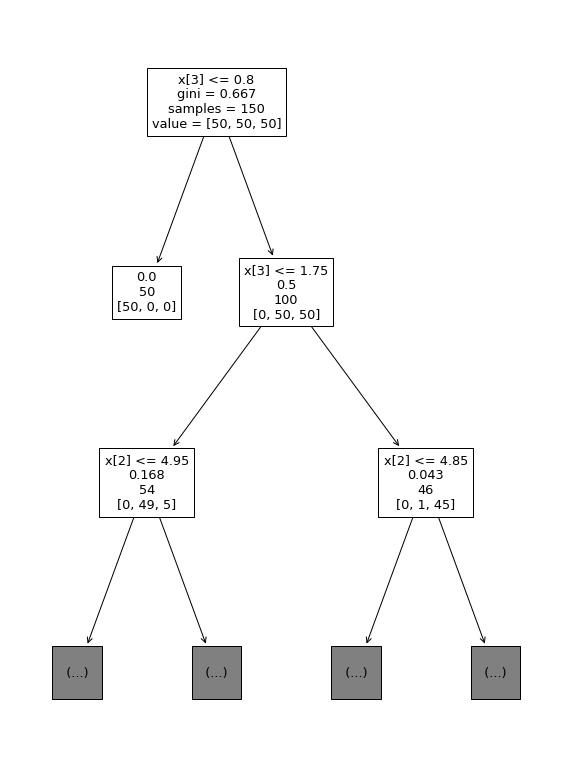

In [3]:
tree_maker = DecisionTreeClassifier()
# Ci sono diversi parametri da settare nel caso si voglia

tree_maker.fit(X, y)
plot_tree(tree_maker, max_depth = 2, label = 'root')
plt.show()

Non so magari qua si potrebbero analizzare alcuni dati come accuratezza e roba varia (magari decidi in seguito). Prova a leggere meglio anche la documentazione per vedere se trovi spunti interessanti da analizzare (magari chiedi anche a Bianchi perchè sembra roba che ho fatto anche in classe).

Potrei provare a implementarlo da solo il codice: vediamo cosa ne esce fuori. Il vero problema sarebbe capire come implementare bene un albero (cerca magari online se è possibile avere già una classe tree o qualcosa del genere). Inoltre c'è da capire come scegliere il cutpoint (quello che sulle note è indicato come *s*) perchè in teoria può assumere un numero esorbitante di valori.

Ma cosa succede se mi limito a considerare due feature?

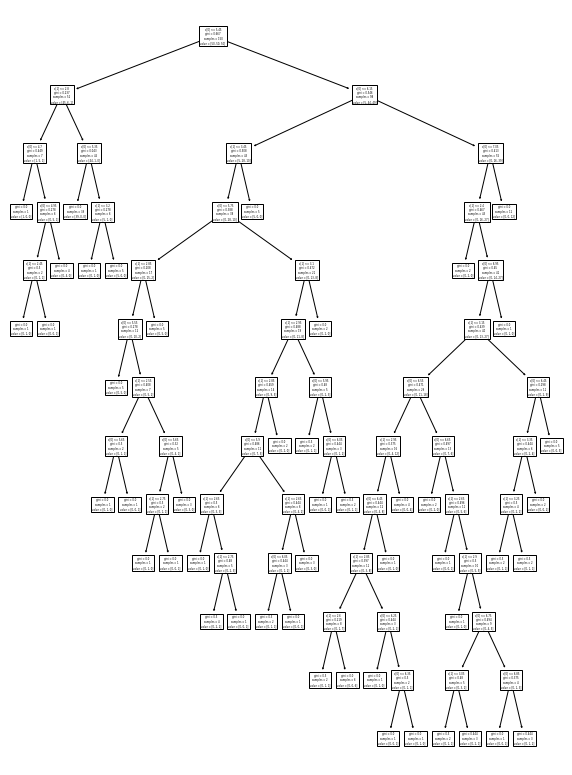

In [4]:
tree_maker = DecisionTreeClassifier()
# Ci sono diversi parametri da settare nel caso si voglia

X2 = X[:, (0,1)]
tree_maker.fit(X2, y)
plot_tree(tree_maker)
plt.show()

Sono curioso di vedere cosa succede se uso il dataset con i due cerchi concentrici che ho usato nella logistic regression. Proviamo.

0.6666666666666666


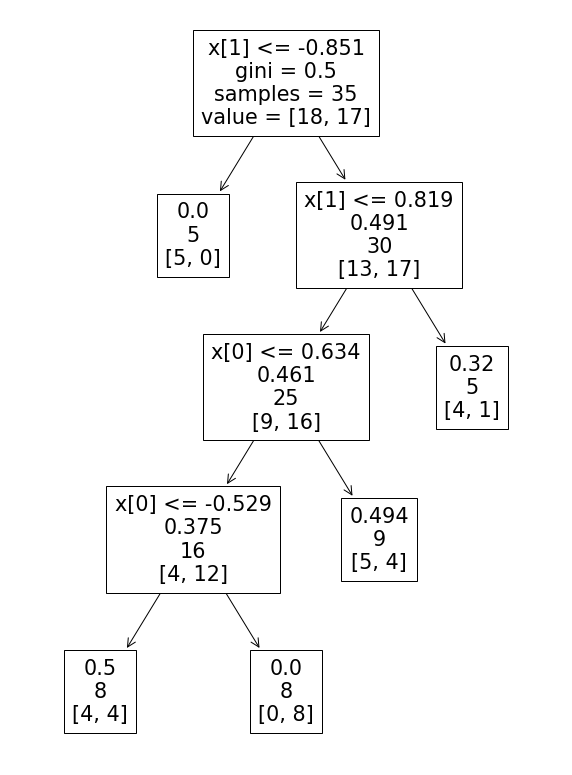

In [21]:
X_circles, y_circles = make_circles(n_samples=50, noise=0.05, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X_circles, y_circles, train_size= 0.7, random_state = 1)

tree_maker = DecisionTreeClassifier(min_samples_leaf = 5)
# Ci sono diversi parametri da settare nel caso si voglia

tree_maker.fit(X_train, y_train)
plot_tree(tree_maker, label = 'root')
y_pred = tree_maker.predict(X_test)
print(accuracy_score(y_test, y_pred))

# Non è male come accuratezza però si può fare di meglio

0.7333333333333333


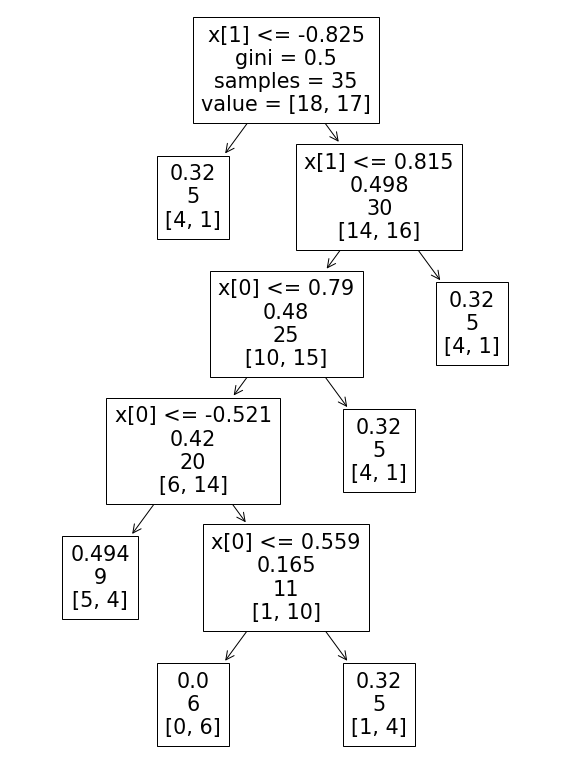

In [22]:
# Ripeto l'operazione con una divisione diversa

X_train, X_test, y_train, y_test = train_test_split(X_circles, y_circles, train_size= 0.7, random_state = 20)

tree_maker = DecisionTreeClassifier(min_samples_leaf = 5)
# Ci sono diversi parametri da settare nel caso si voglia

tree_maker.fit(X_train, y_train)
plot_tree(tree_maker, label = 'root')
y_pred = tree_maker.predict(X_test)
print(accuracy_score(y_test, y_pred))

# Non è male come accuratezza però si può fare di meglio

0.4666666666666667


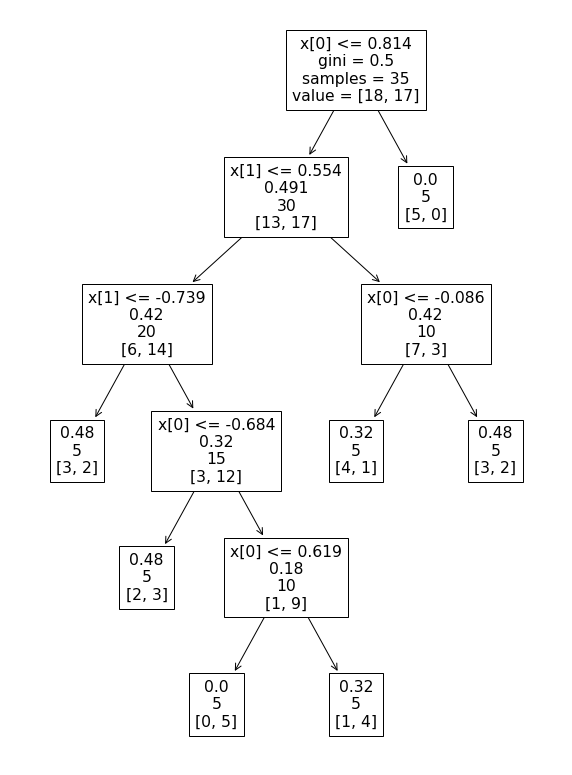

In [24]:
# Proviamone un terzo: si vede effettivamente che è soggetto ad alta varianza

X_train, X_test, y_train, y_test = train_test_split(X_circles, y_circles, train_size= 0.7, random_state = 5)

tree_maker = DecisionTreeClassifier(min_samples_leaf = 5)
# Ci sono diversi parametri da settare nel caso si voglia

tree_maker.fit(X_train, y_train)
plot_tree(tree_maker, label = 'root')
y_pred = tree_maker.predict(X_test)
print(accuracy_score(y_test, y_pred))

# Non è male come accuratezza però si può fare di meglio

## Random Forests
Proviamo ora a vedere come implementare le Random Forests e il Bagging. Faccio riferimento alla seguente [Documentazione](https://scikit-learn.org/stable/modules/ensemble.html). \
Per quanto riguarda le random forests si può usare il metodo [RandomForestClassifier()](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier). Proviamo a vedere che effettivamente ne riduce la varianza lavorare così. Cerchiamo un dataset con un po' di predittori. Proviamo ad esempio il breast cancer.

In [8]:
cancer = load_breast_cancer()

X_cancer = cancer.data
y_cancer = cancer.target

In [9]:
random_for = RandomForestClassifier(n_estimators = 100)

X_train, X_val, y_train, y_val = train_test_split(X_cancer, y_cancer, train_size = 0.7, random_state=1)

tree_maker = DecisionTreeClassifier(min_samples_leaf = 5)
# Ci sono diversi parametri da settare nel caso si voglia
tree_maker.fit(X_train, y_train)
y_tree = tree_maker.predict(X_val)
acc_tree = accuracy_score(y_val, y_tree)
print(f"L'accuratezza dedotta con gli alberi normali è data da: {acc_tree}")

rf_data = random_for.fit(X_train, y_train)
y1 = rf_data.predict(X_val)
#acc = (y1[:] == y_val[:])
acc = accuracy_score(y_val, y1)
print(f"L'accuratezza dedotta con le random forest è data da: {acc}")

L'accuratezza dedotta con gli alberi normali è data da: 0.9590643274853801
L'accuratezza dedotta con le random forest è data da: 0.9473684210526315


In [10]:
random_for = RandomForestClassifier(n_estimators = 100)

X_train, X_val, y_train, y_val = train_test_split(X_cancer, y_cancer, train_size = 0.7, random_state=10)

tree_maker = DecisionTreeClassifier(min_samples_leaf = 5)
# Ci sono diversi parametri da settare nel caso si voglia
tree_maker.fit(X_train, y_train)
y_tree = tree_maker.predict(X_val)
acc_tree = accuracy_score(y_val, y_tree)
print(f"L'accuratezza dedotta con gli alberi normali è data da: {acc_tree}")

rf_data = random_for.fit(X_train, y_train)
y1 = rf_data.predict(X_val)
#acc = (y1[:] == y_val[:])
acc = accuracy_score(y_val, y1)
print(f"L'accuratezza dedotta con le random forest è data da: {acc}")

L'accuratezza dedotta con gli alberi normali è data da: 0.9298245614035088
L'accuratezza dedotta con le random forest è data da: 0.9824561403508771


In [11]:
random_for = RandomForestClassifier(n_estimators = 100)

X_train, X_val, y_train, y_val = train_test_split(X_cancer, y_cancer, train_size = 0.7, random_state=5)

tree_maker = DecisionTreeClassifier(min_samples_leaf = 5)
# Ci sono diversi parametri da settare nel caso si voglia
tree_maker.fit(X_train, y_train)
y_tree = tree_maker.predict(X_val)
acc_tree = accuracy_score(y_val, y_tree)
print(f"L'accuratezza dedotta con gli alberi normali è data da: {acc_tree}")

rf_data = random_for.fit(X_train, y_train)
y1 = rf_data.predict(X_val)
#acc = (y1[:] == y_val[:])
acc = accuracy_score(y_val, y1)
print(f"L'accuratezza dedotta con le random forest è data da: {acc}")

L'accuratezza dedotta con gli alberi normali è data da: 0.9122807017543859
L'accuratezza dedotta con le random forest è data da: 0.9766081871345029


L'accuratezza è ancora abbastanza simile ma i risultati sono comunque vicini, cercane uno migliore. Ma se riprovassi coi dati di prima?

In [12]:
X_circles, y_circles = make_circles(n_samples=50, noise=0.05, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X_circles, y_circles, train_size= 0.7, random_state = 1)

tree_maker = DecisionTreeClassifier(min_samples_leaf = 5)
# Ci sono diversi parametri da settare nel caso si voglia
tree_maker.fit(X_train, y_train)
y_tree = tree_maker.predict(X_test)
acc_tree = accuracy_score(y_test, y_tree)
print(f"L'accuratezza dedotta con gli alberi normali è data da: {acc_tree}")

rf_data = random_for.fit(X_train, y_train)
y1 = rf_data.predict(X_test)
#acc = (y1[:] == y_val[:])
acc = accuracy_score(y_test, y1)
print(f"L'accuratezza dedotta con le random forest è data da: {acc}")

L'accuratezza dedotta con gli alberi normali è data da: 0.6666666666666666
L'accuratezza dedotta con le random forest è data da: 0.8


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_circles, y_circles, train_size= 0.7, random_state = 5)

tree_maker = DecisionTreeClassifier(min_samples_leaf = 5)
# Ci sono diversi parametri da settare nel caso si voglia
tree_maker.fit(X_train, y_train)
y_tree = tree_maker.predict(X_test)
acc_tree = accuracy_score(y_test, y_tree)
print(f"L'accuratezza dedotta con gli alberi normali è data da: {acc_tree}")

rf_data = random_for.fit(X_train, y_train)
y1 = rf_data.predict(X_test)
#acc = (y1[:] == y_val[:])
acc = accuracy_score(y_test, y1)
print(f"L'accuratezza dedotta con le random forest è data da: {acc}")

L'accuratezza dedotta con gli alberi normali è data da: 0.4666666666666667
L'accuratezza dedotta con le random forest è data da: 0.6


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_circles, y_circles, train_size= 0.7, random_state = 10)

tree_maker = DecisionTreeClassifier(min_samples_leaf = 5)
# Ci sono diversi parametri da settare nel caso si voglia
tree_maker.fit(X_train, y_train)
y_tree = tree_maker.predict(X_test)
acc_tree = accuracy_score(y_test, y_tree)
print(f"L'accuratezza dedotta con gli alberi normali è data da: {acc_tree}")

rf_data = random_for.fit(X_train, y_train)
y1 = rf_data.predict(X_test)
#acc = (y1[:] == y_val[:])
acc = accuracy_score(y_test, y1)
print(f"L'accuratezza dedotta con le random forest è data da: {acc}")

L'accuratezza dedotta con gli alberi normali è data da: 0.6
L'accuratezza dedotta con le random forest è data da: 0.9333333333333333


Non so come sistemare il fatto della varianza, però migliora decisamente la capacità predittoria.

## Pruning
Proviamo ora ad eseguire il pruning. Prendiamo un dataset importante, ad esempio il twoo moon con molti dati.

In [15]:
X_circles1, y_circles1 = make_circles(n_samples=500, noise=0.05, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_circles1, y_circles1, train_size = 0.7, random_state=10)

alpha = np.linspace(0, 0.01, 10)

acc = []

for i in range(len(alpha)): 
    tree_maker = DecisionTreeClassifier(min_samples_leaf = 5, ccp_alpha = alpha[i])
    # Ci sono diversi parametri da settare nel caso si voglia
    tree_maker.fit(X_train, y_train)
    #plot_tree(tree_maker)
    #plt.show()
    y_tree = tree_maker.predict(X_val)
    acc_tree = accuracy_score(y_val, y_tree)
    acc.append(acc_tree)
    
print(acc)

[0.8066666666666666, 0.8066666666666666, 0.8066666666666666, 0.8066666666666666, 0.8066666666666666, 0.8066666666666666, 0.8066666666666666, 0.8066666666666666, 0.8133333333333334, 0.8133333333333334]


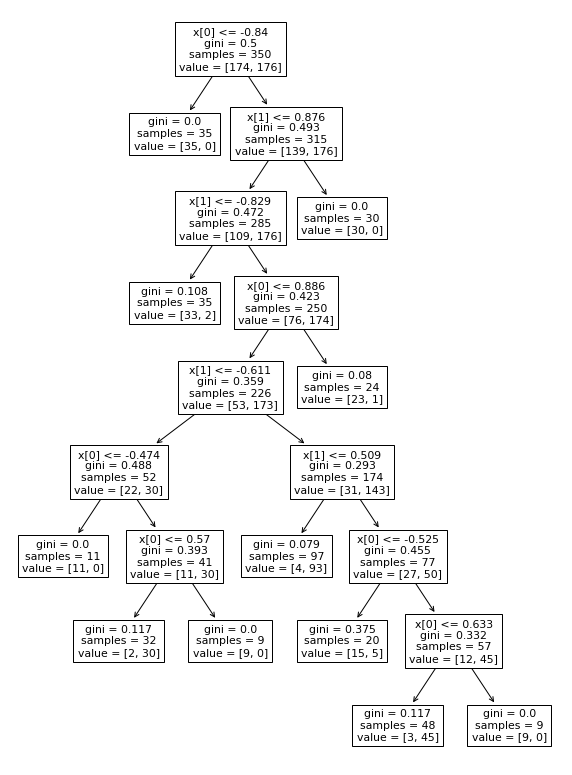

In [16]:
# Prendiamo ad esempio alpha = 0.01

a = 0.01
tree_maker = DecisionTreeClassifier(min_samples_leaf = 5, ccp_alpha = a)
# Ci sono diversi parametri da settare nel caso si voglia
tree_maker.fit(X_train, y_train)
plot_tree(tree_maker)
plt.show()

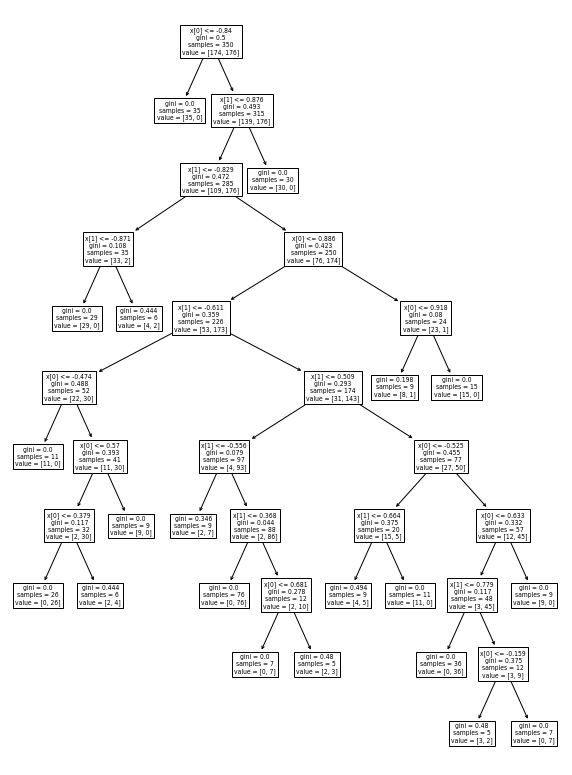

In [17]:
# Normale invece uscirebbee
tree_maker = DecisionTreeClassifier(min_samples_leaf = 5)
# Ci sono diversi parametri da settare nel caso si voglia
tree_maker.fit(X_train, y_train)
plot_tree(tree_maker)
plt.show()